## Import dependencies

In [1]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary
from torchvision import datasets, transforms

In [3]:
from training.utils import get_device, print_cuda_info
from training.data_prep import load_data

## Load and prepare data

In [4]:
print_cuda_info()

CUDA Available? True


In [5]:
input_image_size = (28, 28)
train_data, test_data = load_data(train_transforms=[
     # transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
        transforms.Resize(input_image_size),
        # transforms.RandomRotation((-7., 7.), fill=0),
])

In [6]:
from training.model_trainer import ModelTrainer

trainer = ModelTrainer()

trainer.init_data_loaders(train_data, test_data, batch_size=512,
                          shuffle=True, num_workers=2, pin_memory=True)

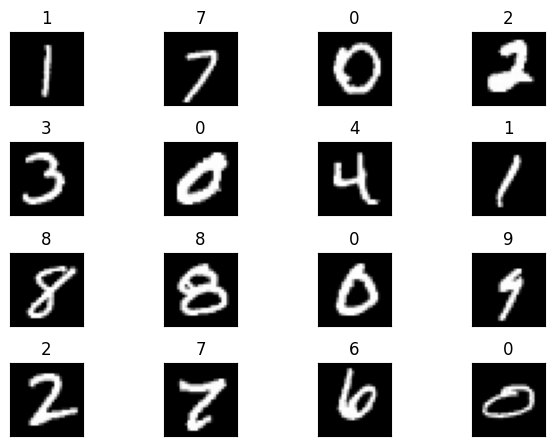

In [7]:
trainer.show_sample_images_from_dataset(4,4)

## Load Model

In [8]:
from models.model_3 import Net
device = get_device()

model = Net().to(device)
summary(model, input_size=(1,*input_image_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              80
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
            Conv2d-4           [-1, 16, 24, 24]           1,168
              ReLU-5           [-1, 16, 24, 24]               0
       BatchNorm2d-6           [-1, 16, 24, 24]              32
            Conv2d-7           [-1, 24, 22, 22]           3,480
              ReLU-8           [-1, 24, 22, 22]               0
       BatchNorm2d-9           [-1, 24, 22, 22]              48
        MaxPool2d-10           [-1, 24, 11, 11]               0
           Conv2d-11             [-1, 10, 9, 9]           2,170
             ReLU-12             [-1, 10, 9, 9]               0
      BatchNorm2d-13             [-1, 10, 9, 9]              20
AdaptiveAvgPool2d-14             [-1, 1

/content/models/model_3.py:56: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


## Start training

In [9]:
device = torch.cuda.current_device()
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1, verbose=True)
criterion = F.nll_loss
num_epochs = 15

trainer.run_training(model, device, optimizer, criterion, scheduler, num_epochs)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.1884 Batch_id=117 Accuracy=84.81: 100%|██████████| 118/118 [00:20<00:00,  5.85it/s]


Test set: Average loss: 0.1419, Accuracy: 9668/10000 (96.68%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0978 Batch_id=117 Accuracy=97.06: 100%|██████████| 118/118 [00:15<00:00,  7.58it/s]


Test set: Average loss: 0.0850, Accuracy: 9793/10000 (97.93%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0858 Batch_id=117 Accuracy=97.87: 100%|██████████| 118/118 [00:16<00:00,  7.13it/s]


Test set: Average loss: 0.0690, Accuracy: 9815/10000 (98.15%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0510 Batch_id=117 Accuracy=98.24: 100%|██████████| 118/118 [00:15<00:00,  7.71it/s]


Test set: Average loss: 0.0564, Accuracy: 9842/10000 (98.42%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0287 Batch_id=117 Accuracy=98.50: 100%|██████████| 118/118 [00:17<00:00,  6.83it/s]


Test set: Average loss: 0.0503, Accuracy: 9857/10000 (98.57%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0905 Batch_id=117 Accuracy=98.59: 100%|██████████| 118/118 [00:16<00:00,  7.33it/s]


Test set: Average loss: 0.0472, Accuracy: 9862/10000 (98.62%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0174 Batch_id=117 Accuracy=98.77: 100%|██████████| 118/118 [00:16<00:00,  7.12it/s]


Test set: Average loss: 0.0473, Accuracy: 9849/10000 (98.49%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0638 Batch_id=117 Accuracy=98.90: 100%|██████████| 118/118 [00:15<00:00,  7.53it/s]


Test set: Average loss: 0.0395, Accuracy: 9879/10000 (98.79%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0519 Batch_id=117 Accuracy=98.89: 100%|██████████| 118/118 [00:15<00:00,  7.58it/s]


Test set: Average loss: 0.0440, Accuracy: 9864/10000 (98.64%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0547 Batch_id=117 Accuracy=99.00: 100%|██████████| 118/118 [00:16<00:00,  7.16it/s]


Test set: Average loss: 0.0374, Accuracy: 9885/10000 (98.85%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


Train: Loss=0.0311 Batch_id=117 Accuracy=99.19: 100%|██████████| 118/118 [00:15<00:00,  7.51it/s]


Test set: Average loss: 0.0338, Accuracy: 9893/10000 (98.93%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


Train: Loss=0.0172 Batch_id=117 Accuracy=99.23: 100%|██████████| 118/118 [00:16<00:00,  7.07it/s]


Test set: Average loss: 0.0335, Accuracy: 9894/10000 (98.94%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 13


Train: Loss=0.0761 Batch_id=117 Accuracy=99.23: 100%|██████████| 118/118 [00:15<00:00,  7.50it/s]


Test set: Average loss: 0.0337, Accuracy: 9893/10000 (98.93%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 14


Train: Loss=0.0683 Batch_id=117 Accuracy=99.24: 100%|██████████| 118/118 [00:15<00:00,  7.48it/s]


Test set: Average loss: 0.0336, Accuracy: 9898/10000 (98.98%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 15


Train: Loss=0.0234 Batch_id=117 Accuracy=99.25: 100%|██████████| 118/118 [00:16<00:00,  7.30it/s]


Test set: Average loss: 0.0330, Accuracy: 9899/10000 (98.99%)

Adjusting learning rate of group 0 to 1.0000e-03.


## Analyze Results

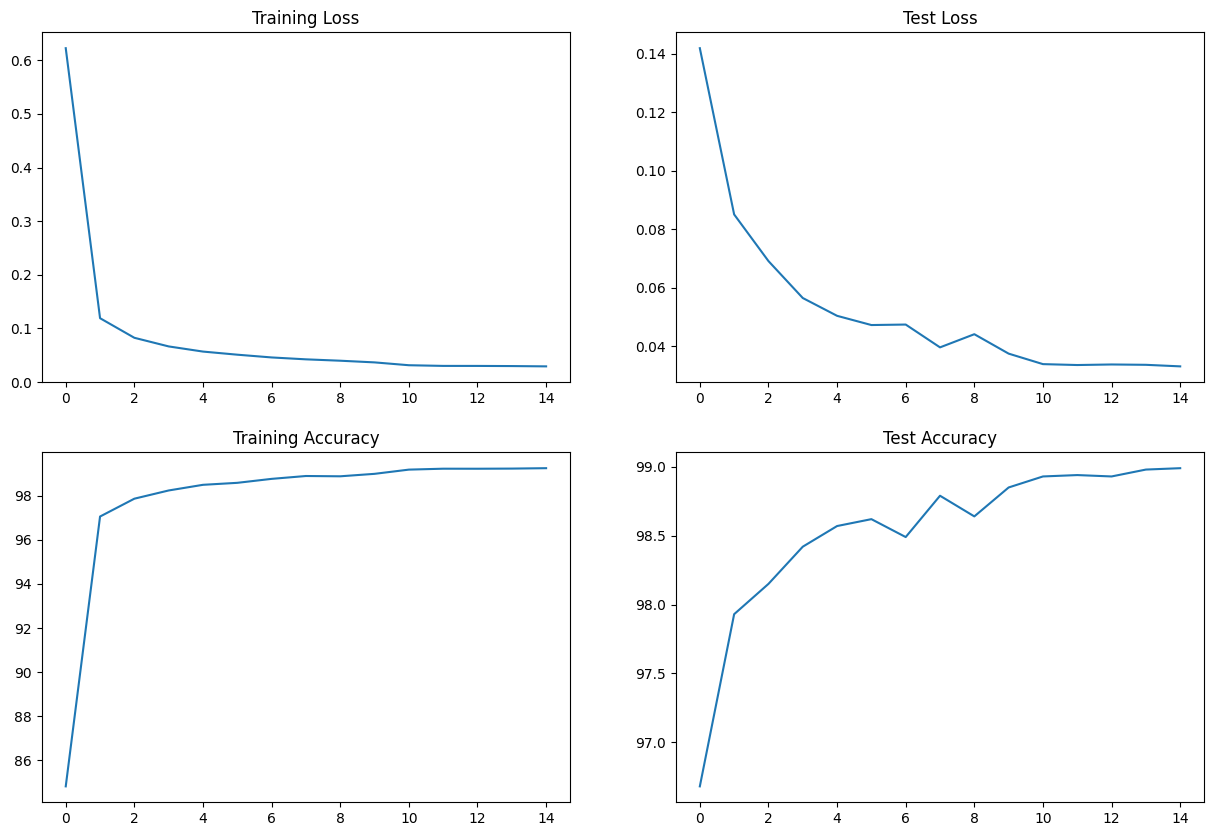

In [10]:
trainer.plot_accuracy_and_loss(fig_size=(15, 10))

In [11]:
#  Observations:
#    6, 9, 8 have smaller circles
#    1 and 7 have similar shape
#    0 2 3 4 5 don't have re-usable similarities
#    -> so 7 or 8 channels should be enough to capture the basic patterns
# Target:
#   Reduce the model parameters to less than 8k
# Results:
#   Parameters: 7,924
#   Best train accuracy: 99.25
#   Best test accuracy: 99.99
# Analysis:
#   The model still managed to converge fast after param reduction.
#   The model starts to overfit from 10th epoch.
